## **SCORING - Vitamin E: Workflow 6.1**
#### **Micha Birklbauer 2021-08-11**

In [1]:
import os
from shutil import copyfile
from itertools import islice
copyfile("../../../scripts/python/scoring.py", "scoring.py")

'scoring.py'

In [2]:
import pandas as pd
from scoring import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Hydrogen_Bond:TRP102B,Hydrogen_Bond:LYS394B,Hydrophobic_Interaction:LEU111B,Hydrogen_Bond:ASP166B,Halogen_Bond:TRP102B,Hydrophobic_Interaction:ASP106B,Salt_Bridge:HIS125B,Hydrophobic_Interaction:PRO164B,...,Salt_Bridge:ARG68B,Pi-Cation_Interaction:LYS140B,Salt_Bridge:HIS130B,Hydrogen_Bond:VAL389B,Hydrophobic_Interaction:HIS130B,Hydrogen_Bond:ARG101B,Hydrogen_Bond:HIS130B,Hydrogen_Bond:LYS140B,Hydrogen_Bond:CYS99B,LABEL
0,1,28|VitaminE_allmin_active|sdf|28,0,0,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,active
1,2,101|VitaminE_allmin_active|sdf|101,0,2,1,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,active
2,3,111|VitaminE_allmin_decoy|sdf|111,0,0,0,1,1,0,0,0,...,1,0,0,0,1,2,0,0,0,inactive
3,4,54|VitaminE_allmin_decoy|sdf|54,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,inactive
4,5,110|VitaminE_allmin_active|sdf|110,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,77,82|VitaminE_allmin_active|sdf|82,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,active
77,78,103|VitaminE_allmin_active|sdf|103,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,active
78,79,105|VitaminE_allmin_decoy|sdf|105,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,inactive
79,80,114|VitaminE_allmin_active|sdf|114,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,active


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(81, 88) 56


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(21, 88) 9


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(26, 88) 16


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrogen_Bond:ARG138B,0.403571,0.196429,0.60
1,2,Hydrophobic_Interaction:LEU66B,0.385000,0.625000,0.24
2,3,Hydrophobic_Interaction:GLN129B,0.300000,0.500000,0.20
3,4,Hydrophobic_Interaction:ALA388B,0.270000,0.250000,0.52
4,5,Pi-Cation_Interaction:ARG101B,0.261429,0.178571,0.44
...,...,...,...,...,...
80,81,Hydrogen_Bond:HIS125B,0.004286,0.035714,0.04
81,82,Hydrophobic_Interaction:VAL29B,0.004286,0.035714,0.04
82,83,Pi-Cation_Interaction:LYS133B,0.004286,0.035714,0.04
83,84,Hydrogen_Bond:ALA388B,0.004286,0.035714,0.04


#### **Extract relevant features:**

In [10]:
optimized_values = get_optimized_feature_thresholds(features, data_train)

In [11]:
for item in islice(optimized_values["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat1 Accuracy: 0.8641975308641975
Key: 0.0, 0.0, 0.0: strat3 Accuracy: 0.8641975308641975
Key: 0.0, 0.0, 0.0: strat2 Accuracy: 0.8518518518518519
Key: 0.0, 0.05, 0.0: strat1 Accuracy: 0.8518518518518519
Key: 0.0, 0.0, 0.0: strat4 Accuracy: 0.8395061728395061


In [12]:
for item in islice(optimized_values["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.8942857142857142
Key: 0.0, 0.0, 0.0: strat2 Area under the ROC curve: 0.8814285714285715
Key: 0.0, 0.0, 0.0: strat3 Area under the ROC curve: 0.8810714285714286
Key: 0.0, 0.0, 0.0: strat1 Area under the ROC curve: 0.8674999999999999
Key: 0.0, 0.05, 0.0: strat2 Area under the ROC curve: 0.8639285714285714


In [13]:
optimized_values_val = get_optimized_feature_thresholds(features, data_train, data_val)

In [14]:
for item in islice(optimized_values_val["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.0, 0.15000000000000002, 0.0: strat4 Accuracy: 0.7142857142857143
Key: 0.0, 0.15000000000000002, 0.05: strat4 Accuracy: 0.7142857142857143
Key: 0.0, 0.2, 0.0: strat2 Accuracy: 0.7142857142857143
Key: 0.0, 0.2, 0.0: strat3 Accuracy: 0.7142857142857143
Key: 0.0, 0.2, 0.0: strat4 Accuracy: 0.7142857142857143


In [15]:
for item in islice(optimized_values_val["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.05, 0.0, 0.55: strat3 Area under the ROC curve: 0.6712962962962963
Key: 0.05, 0.05, 0.55: strat3 Area under the ROC curve: 0.6712962962962963
Key: 0.05, 0.1, 0.55: strat3 Area under the ROC curve: 0.6712962962962963
Key: 0.05, 0.15000000000000002, 0.55: strat3 Area under the ROC curve: 0.6712962962962963
Key: 0.1, 0.0, 0.55: strat3 Area under the ROC curve: 0.6712962962962963


In [16]:
features_filtered = get_relevant_features(features, 0.0, 0.2, 0.0)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
1,2,Hydrophobic_Interaction:LEU66B,0.385000,0.625000,0.24
2,3,Hydrophobic_Interaction:GLN129B,0.300000,0.500000,0.20
3,4,Hydrophobic_Interaction:ALA388B,0.270000,0.250000,0.52
5,6,Hydrophobic_Interaction:HIS130B,0.260000,0.500000,0.24
6,7,Hydrophobic_Interaction:PRO164B,0.245714,0.285714,0.04
8,9,Hydrophobic_Interaction:GLU108B,0.185714,0.214286,0.40
10,11,Hydrophobic_Interaction:GLN141B,0.162143,0.482143,0.32
11,12,Hydrophobic_Interaction:ILE126B,0.161429,0.321429,0.16
13,14,Hydrogen_Bond:ARG68B,0.152143,0.232143,0.08
14,15,Hydrophobic_Interaction:VAL107B,0.150000,0.750000,0.60


In [17]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [18]:
positives, negatives = get_feature_impact(features_filtered)

In [19]:
positives

['Hydrophobic_Interaction:LEU66B',
 'Hydrophobic_Interaction:GLN129B',
 'Hydrophobic_Interaction:HIS130B',
 'Hydrophobic_Interaction:PRO164B',
 'Hydrophobic_Interaction:GLN141B',
 'Hydrophobic_Interaction:ILE126B',
 'Hydrogen_Bond:ARG68B',
 'Hydrophobic_Interaction:VAL107B',
 'Hydrogen_Bond:ARG165B',
 'Hydrogen_Bond:ASP166B',
 'Hydrophobic_Interaction:LYS133B',
 'Hydrogen_Bond:GLU108B',
 'Hydrophobic_Interaction:TYR142B',
 'Hydrophobic_Interaction:VAL109B',
 'Hydrogen_Bond:LYS394B']

In [20]:
negatives

['Hydrophobic_Interaction:ALA388B',
 'Hydrophobic_Interaction:GLU108B',
 'Hydrogen_Bond:ARG101B',
 'Hydrophobic_Interaction:THR137B',
 'Hydrophobic_Interaction:VAL110B',
 'Hydrophobic_Interaction:GLU134B']

#### **Score Compounds with different strategies & save results:**

In [21]:
save = False

# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
if save:
    train_result_strat1_sorted.to_csv("train_scores1.csv")
    train_result_strat2_sorted.to_csv("train_scores2.csv")
    train_result_strat3_sorted.to_csv("train_scores3.csv")
    train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [22]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [4, 0.8024691358024691] 
Strategy 2:  [4, 0.8024691358024691] 
Strategy 3:  [0, 0.7777777777777778] 
Strategy 4:  [0, 0.7654320987654321]


*accuracy for best cutoff:*

In [23]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 4, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 4, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 0, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 0, "accuracy")
)

Strategy 1:  0.8024691358024691 
Strategy 2:  0.8024691358024691 
Strategy 3:  0.7777777777777778 
Strategy 4:  0.7654320987654321


*false positive rate for best cutoff:*

In [24]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 4, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 4, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 0, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 0, "fpr")
)

Strategy 1:  0.36 
Strategy 2:  0.4 
Strategy 3:  0.48 
Strategy 4:  0.48


#### **Calculate validation and test results:**

In [25]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [26]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 4, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 4, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, 0, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, 0, pretty_print = True)
)

Strategy 1:  {'ACC': 0.8024691358024691, 'FPR': 0.36, 'AUC': 0.7614285714285713, 'Ya': 0.8448275862068966, 'EF': 1.2219827586206897, 'REF': 87.5} 
Strategy 2:  {'ACC': 0.8024691358024691, 'FPR': 0.4, 'AUC': 0.7767857142857142, 'Ya': 0.8333333333333334, 'EF': 1.205357142857143, 'REF': 89.28571428571429} 
Strategy 3:  {'ACC': 0.7777777777777778, 'FPR': 0.48, 'AUC': 0.7535714285714286, 'Ya': 0.8064516129032258, 'EF': 1.1664746543778801, 'REF': 89.28571428571429} 
Strategy 4:  {'ACC': 0.7654320987654321, 'FPR': 0.48, 'AUC': 0.7889285714285714, 'Ya': 0.8032786885245902, 'EF': 1.1618852459016393, 'REF': 87.5}


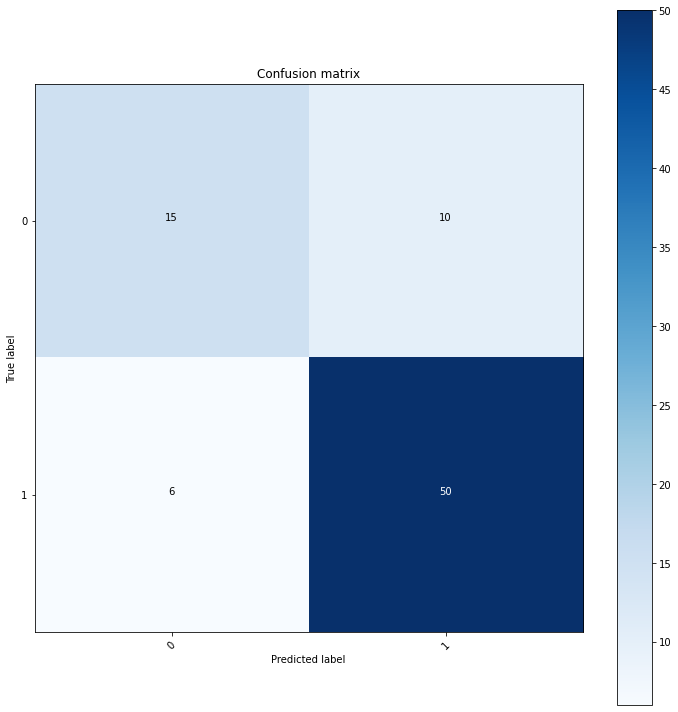

In [28]:
plot_confusion_matrix(get_metrics(train_result_strat2, 4)["CM"], classes = [0, 1], filename = "results/CM_train_strat2.png");

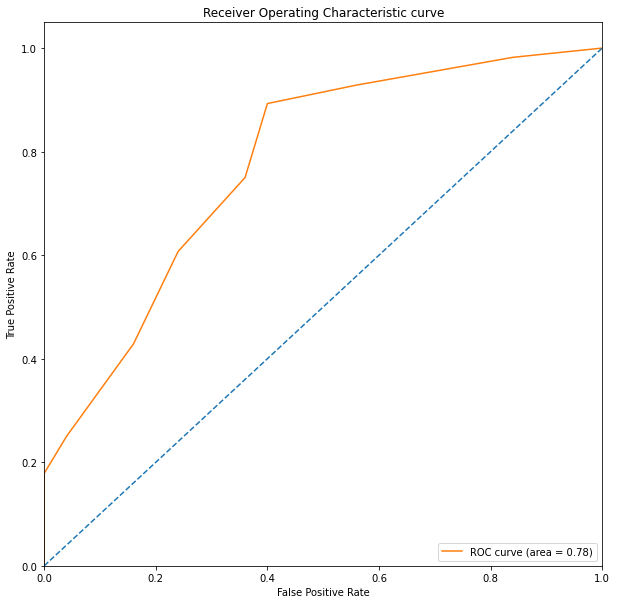

In [29]:
roc = get_metrics(train_result_strat2, 4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat2.png");

*validation data:*

In [30]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 4, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 4, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, 0, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, 0, pretty_print = True)
)

Strategy 1:  {'ACC': 0.6190476190476191, 'FPR': 0.4166666666666667, 'AUC': 0.5462962962962963, 'Ya': 0.5454545454545454, 'EF': 1.2727272727272727, 'REF': 66.66666666666667} 
Strategy 2:  {'ACC': 0.7142857142857143, 'FPR': 0.4166666666666667, 'AUC': 0.5648148148148149, 'Ya': 0.6153846153846154, 'EF': 1.4358974358974361, 'REF': 88.88888888888889} 
Strategy 3:  {'ACC': 0.7142857142857143, 'FPR': 0.4166666666666667, 'AUC': 0.5740740740740741, 'Ya': 0.6153846153846154, 'EF': 1.4358974358974361, 'REF': 88.88888888888889} 
Strategy 4:  {'ACC': 0.7142857142857143, 'FPR': 0.4166666666666667, 'AUC': 0.5509259259259258, 'Ya': 0.6153846153846154, 'EF': 1.4358974358974361, 'REF': 88.88888888888889}


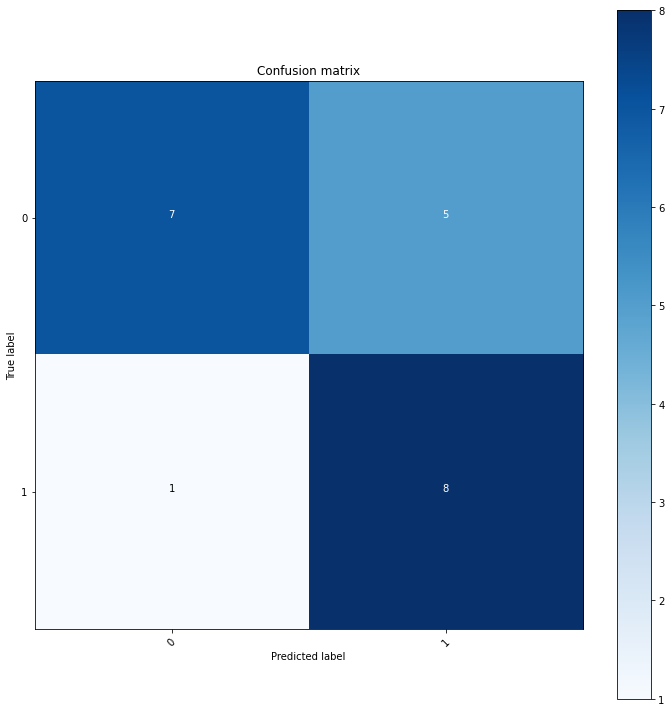

In [31]:
plot_confusion_matrix(get_metrics(val_result_strat2, 4)["CM"], classes = [0, 1], filename = "results/CM_val_strat2.png");

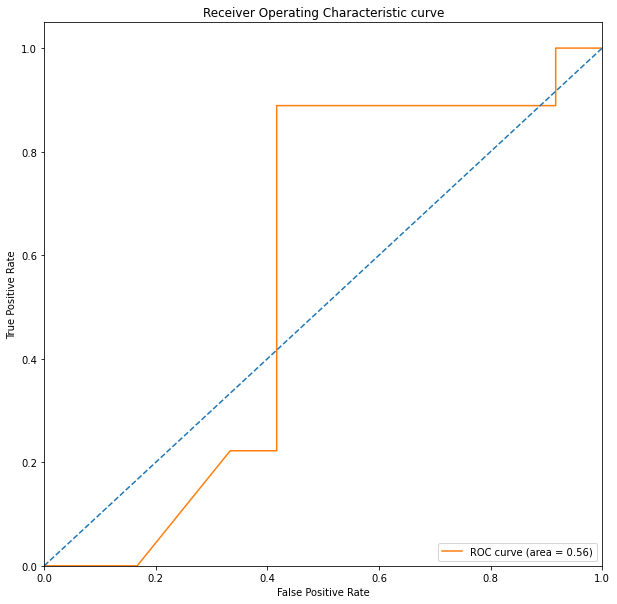

In [32]:
roc = get_metrics(val_result_strat2, 4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat2.png");

*test data:*

In [33]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 4, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 4, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, 0, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, 0, pretty_print = True)
)

Strategy 1:  {'ACC': 0.46153846153846156, 'FPR': 0.9, 'AUC': 0.48750000000000004, 'Ya': 0.55, 'EF': 0.89375, 'REF': 68.75} 
Strategy 2:  {'ACC': 0.5, 'FPR': 0.9, 'AUC': 0.49375, 'Ya': 0.5714285714285714, 'EF': 0.9285714285714285, 'REF': 75.0} 
Strategy 3:  {'ACC': 0.5, 'FPR': 1.0, 'AUC': 0.4625, 'Ya': 0.5652173913043478, 'EF': 0.9184782608695651, 'REF': 81.25} 
Strategy 4:  {'ACC': 0.5, 'FPR': 1.0, 'AUC': 0.46249999999999997, 'Ya': 0.5652173913043478, 'EF': 0.9184782608695651, 'REF': 81.25}


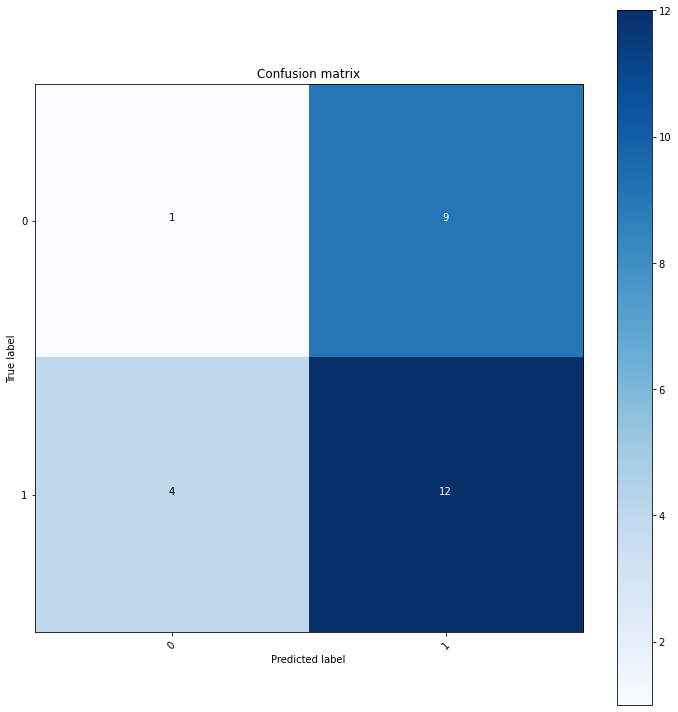

In [34]:
plot_confusion_matrix(get_metrics(test_result_strat2, 4)["CM"], classes = [0, 1], filename = "results/CM_test_strat2.png");

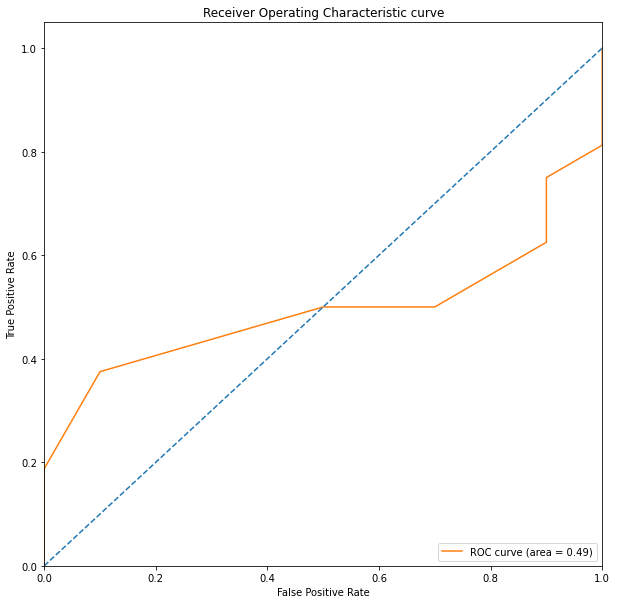

In [35]:
roc = get_metrics(test_result_strat2, 4)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat2.png");

#### **Clean up:**

In [36]:
os.remove("scoring.py")